In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_25205_U')

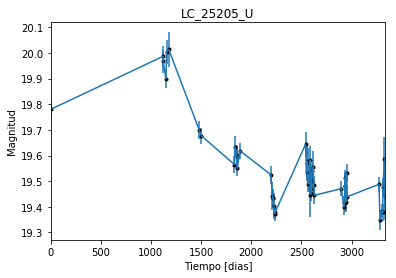

In [2]:
data = np.genfromtxt('LC_25205_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_25205_U')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

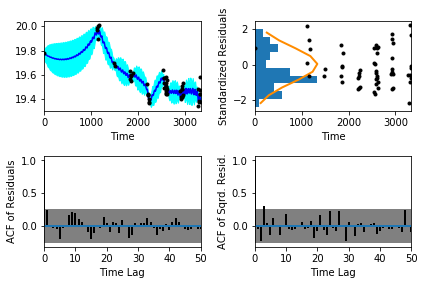

In [5]:
sample.assess_fit()

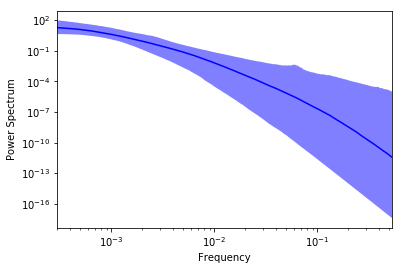

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_25205_U')

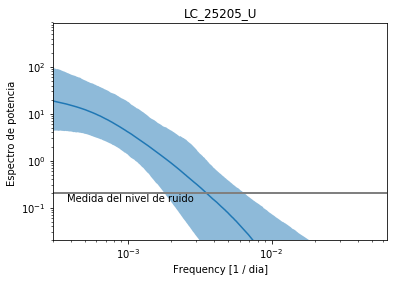

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_25205_U')

Text(0.5,1,'LC_25205_U')

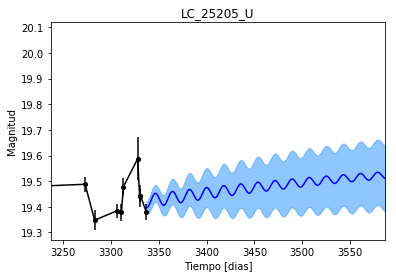

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')
plt.title('LC_25205_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_25205_U')

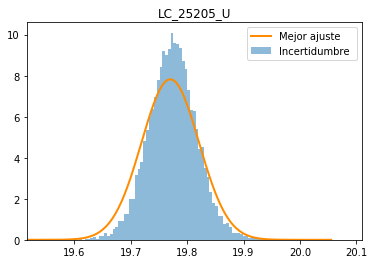

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_25205_U')

Text(0.5,1,'LC_25205_U')

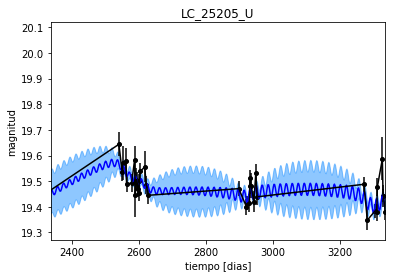

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')
plt.title('LC_25205_U')

Text(0.5,1,'LC_25205_U')

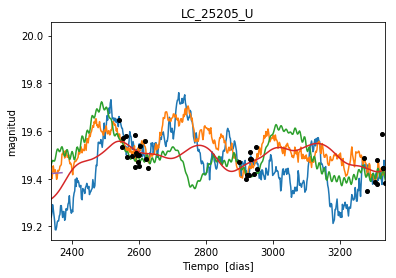

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')
plt.title('LC_25205_U')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 498.32438086
Median: 0.0128513038431
Standard deviation: 0.203034678276
68% credibility interval: [ 0.00112788  0.20941441]
95% credibility interval: [  3.66703501e-04   7.83975421e-01]
99% credibility interval: [  3.11614130e-04   9.91925764e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 559.87466906
Median: 0.00204490468924
Standard deviation: 0.0783186442262
68% credibility interval: [ 0.0004381  0.0277293]
95% credibility interval: [ 0.00031459  0.26431173]
99% credibility interval: [  3.04131641e-04   5.18782250e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 36455.7736109
Median: 0.0331732437491
Standard devi

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 742.208047134
Median: 98.4974633996
Standard deviation: 1.75732347372
68% credibility interval: [ 96.68637309  99.84075166]
95% credibility interval: [  94.16737506  101.09365219]
99% credibility interval: [  92.12813927  102.21062037]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1101.42539341
Median: 0.75444732427
Standard deviation: 2.27766921702
68% credibility interval: [ 0.07652434  4.17510904]
95% credibility interval: [ 0.0170339   7.54993757]
99% credibility interval: [  0.010786    10.61969919]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 267.536083595
Median: 0.39930282953
Standard deviation: 9.43144821094
68% credibility interval: [ 0.02539608  7.66879262]
95% credibility interval: [  1.86991122e-0

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1828.40076958
Median: 9.31315403114e-32
Standard deviation: 7.86296312449e+107
68% credibility interval: [  3.18494823e-64   6.09542399e-05]
95% credibility interval: [  1.59627512e-101   5.10634794e+035]
99% credibility interval: [  1.16182793e-108   9.35024013e+050]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1945.04086017
Median: 19.6313758839
Standard deviation: 0.105502905291
68% credibility interval: [ 19.5405362   19.72269563]
95% credibility interval: [ 19.43209941  19.84885339]
99% credibility interval: [ 19.32191224  19.97508553]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 265.225984893
Median: 0.0125964105357
Standard deviation: 0.240920613172
68% credibility interval: [ 0.          0.31470609]
95% credibility interval: [ 0.          0.90113791]
99% credibility interval: [ 0.          1.03629536]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 265.225984893
Median: 0.0125964105357
Standard deviation: 0.240920613172
68% credibility interval: [ 0.          0.31470609]
95% credibility interval: [ 0.          0.90113791]
99% credibility interval: [ 0.          1.03629536]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1309.48953136
Median: 0.0
Standard deviation: 0.00029774574047
68% cre

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 742.208047134
Median: 98.4974633996
Standard deviation: 1.75732347372
68% credibility interval: [ 96.68637309  99.84075166]
95% credibility interval: [  94.16737506  101.09365219]
99% credibility interval: [  92.12813927  102.21062037]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2229.11748558
Median: 0.0365750433974
Standard deviation: 0.0487378900443
68% credibility interval: [ 0.02236553  0.07037265]
95% credibility interval: [ 0.01423602  0.14725357]
99% credibility interval: [ 0.01115363  0.26796132]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 391.219290883
Median: 1.19962525911
Standard deviation: 0.214178940947
68% credibility interval: [ 0.99803627  1.42045865]
95% credibility interval: [ 0.83285725  1.693101  ]
99% credibility interval: [ 0.72973904  1.83041338]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 310.388135172
Median: 0.00015510500477
Standard deviation: 0.186144826515
68% credibility interval: [  2.74870802e-06   9.71989176e-03]
95% credibility interval: [  2.76103181e-40   5.09910925e-01]
99% credibility interval: [  5.54683734e-55   1.25745258e+00]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 498.32438086
Median: (-0.080747123485-0.577343941815j)
Standard deviation: 1.97961046468
68% credibility interval: [-1.31578955-0.75717408j -0.00708669-0.00862387j]
95% credibility interval: [ -4.92586284e+00+0.j          -2.30406605e-03-0.20874283j]
99% credibility interval: [ -6.23245339e+00+0.j          -1.95792932e-03-0.17889981j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 559.87466906
Median: (-0.012848515098+0j)
Standard deviation: 1.59172507541
68% credibility interval: [-0.17422831+6.64304829j -0.00275265+0.j        ]
95% credibility interval: [-1.66071955+6.44737328j -0.00197661+0.j        ]
99% credibility interval: [ -3.25960501e+00+1.93363566j  -1.91091546e-03+0.j        ]
Posterior summary for paramet